# PLAN

- INTRODUCCION: 
   - OBJETIVO DEL PROYECTO : Predecir la variable 'Cut? del data set de diamond
   - TIPO DE PROBLEMA A RESOLVER: Clasificacion mulitcas
   - METRICAS QUE SE UTILIZARAN ( accuracy, F!, etc ) 
  
- CARGA DE LIBRERIAS
  - carga de libreria necesarias - ( IMPORT VARIOS )
  
- CARGAR DATASET

- EDA (ANTES DE DIVIDIR y trasformar)
  - estidisticas basicas(METRICAS CENTRALIDAD Y DISTRIBUCION)
  - correlaciones
  - outlier
  - missing value
  - visualizaciones 

#######################################################     MODELADOS  ############################################################
  
- PREPARACION -  SEPARAR X /y
   -separacion para una unica feature
   - Separar features (X) y variable objetivo (y).
   - Puedes probar primero con una única feature para exploración rápida.
   - Importante: esta operación es antes de cualquier preprocesamiento
   - Separacion multiple. 
  

- TRAIN_TEST SLIT  (IMPORTANTISSIOMO: el X_test  no se usa hasta el final). Aqui utilizamo solo el train ( )
   - verificar proporcionees entre train y test, para asegurarse de que la muestra sea representativa 

- PREPOCESAMIENTO ( con Pipeline) . Es importante que esta operacion se haga despues de dividir X , y
  estas son formas de trasformar los datos en Scikit Learn 
  - Todo el preprocesamiento se hace solo sobre X_train (el pipeline se ajusta con train).
  - Incluye: escalado, codificación de variables categóricas, imputación, etc.
  - Esto asegura que no haya data leakage del test set.

- ENTRENAMIENDO MODELOS
  - cargar modelos que se quiern utilizar (LogisticRegression, RandomForest, SVM, etc.)
  - entrena el modelo ( X_train y y_train) 
  - calcular metricas de entrenamiento para ver desempeño inicial.
  - Aquí todavía no decides cuál es el mejor modelo; solo observas desempeño inicial.
  
  
- VALIDACION CRUZADA ( SE ELIGE EL MODELO. es implicito la evaluacion de rendimiento)
   - Se hace SOLO CON  con X_train / y_train para decidir el modelo ganador y ajustar hiperparámetros.
   - ver rapidamente OVERFITTING Y UNDERFITTING   
   - se valorara el rendimiento con metricas de entrenamiento vs metricas de CV 
       Error de Train mucho menor << que CV  --->  OVERFITTING ( el modelo aprendio demasiado los datos de train y no generaliza)       
       Error de Train  ≈ CV bajo --> UNDERFITTING ( el modelo es demasiado simple)
       Error de Train  ≈ CV alto --> MODELO BIEN AJUSTADO 
       
  - Valoración de rendimiento promedio en CV (cross_val_score).
  - metrica de rendimiento promedio ( CV )

- AJUSTE DE HIPERPARAMETROS  ( si es necesario)
   - Con GridSearchCV o RandomizedSearchCV sobre train usando CV
   - Esto produce el mejor modelo final listo para evaluación en test.

- EVALUACION FINAL
    - Entrenar el modelo seleccionado sobre todo X_train (ya con pipeline y mejores hiperparámetros).

- EVALUCION FINAL EN TEST ( es implicito al evaluacion de rendimiento)
  - Predecir con X_test.
  - Calcular métricas finales:
      Accuracy, F1, Precision/Recall, Confusion Matrix
  - Esta evaluación es la única que refleja desempeño real en datos no vistos.
  - evaluacion rendimiento en test
  - metrica de rendimiento final.
  
- INTERPRETACION - EVALUACION FINAL
  - Analizar: 
     Variables más importantes (feature importance si aplica)
     Patrones de error (dónde falla más)
     Posibles sesgos o problemas de generalización    

- CONCLUSIONES 
  Resumen de hallazgos:
     Qué modelo funcionó mejor
     Qué features son más relevantes
     Posibles mejoras futuras 

# Tareas a realizar
---
1. Introduccion
   - Contexto
   - Objectivo: Que queremos predecir y porques
    
2. Cargar el *dataset diamond* <https://www.kaggle.com/code/rolandmueller/seaborn-diamonds-2-11-2020/input> con Pandas
    
3. Realizar una **exploracion estadistica descriptiva** de los datos con Panda
   - Descripcion de las variables.
   - Correlacion 
   - Valores unicos ( Unique) , mas frecuentes ( top ) , frecuencia de valor mas comun (freq).
   - Inspeccion de balanceo varibales categoricas.
  
4. EDAS (Exploratory Data Analisys)   
   - Detectar valores nulos.
   - Corregir valores nulos.
   - Corregir tipos de datos.
   - Eliminar duplicados.
   - Identificar Outliers y tratarlos.
  
5. Visualizacion 
   - Univariante
   - Bivariante
   - Multivariante
  
6. Modelado
   - Probar *varios* modelos de Scikit Learn , para predecir la columna tip del dataset
   - Escalar las columnas numericas
   - Particionar los datos con *train_test_split*
   - Ver el mejor modelo

# 1. Indroduccion

Disponemos de un Data Set compuesto por 10 variables y 50.000 registos aproximadamente.

El objetivo es predecir la variable cut (corte) que representa la variable de calidad de corte ( Regular , Buena , Muy Buena, Premium , Ideal )  

### Import

- Celda reservada para la carga de modelos y librerias necesarrias para el desarrollo de la actividad

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

### Cargar DataSet 

- Cargamos el DataSet y mostramos las primeras 20 filas para supervisar el Data
- Mostramos los tipos de cada feature 

In [5]:
df = pd.read_csv('diamond.csv')
print(df.sample(n=5))

df.shape 

       Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
33141       33142   0.31    Ideal     G    VVS1   59.5   56.0    816  4.41   
6344         6345   0.90  Premium     H     VS2   61.6   58.0   4032  6.26   
48794       48795   0.78  Premium     J     SI2   60.6   58.0   2022  5.94   
15431       15432   1.00     Good     G     VS1   62.4   62.0   6177  6.33   
27663       27664   2.29  Premium     I     VS2   60.8   60.0  18653  8.47   

          y     z  
33141  4.43  2.63  
6344   6.18  3.83  
48794  5.91  3.59  
15431  6.37  3.96  
27663  8.50  5.16  


(53940, 11)

###  Descripcion FEATURE

In [6]:
data = {
    "Variable": [
        "carat", "cut", "color", "clarity", "depth",
        "table", "price", "x", "y", "z"
    ],
    "Descripción": [
        "Peso del diamante en quilates",
        "Calidad del corte",
        "Color del diamante (D mejor, J peor)",
        "Claridad del diamante",
        "Profundidad total = 2*z/(x+y)",
        "Anchura de la parte superior relativa al punto más ancho",
        "Precio del diamante en dólares estadounidenses",
        "Longitud en mm",
        "Anchura en mm",
        "Profundidad en mm"
    ],
    "Rango / Categorías": [
        "0.2 - 5.01",
        "Fair, Good, Very Good, Premium, Ideal",
        "D, E, F, G, H, I, J",
        "I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF",
        "43 79",
        "43 - 95",
        "326 - 18 823",
        "0 - 10.74",
        "0 - 58.9",
        "0 - 31.8"
    ]
}

df_info = pd.DataFrame(data)
df_info


,Variable,Descripción,Rango / Categorías
0,carat,Peso del diamante en quilates,0.2 - 5.01
1,cut,Calidad del corte,"Fair, Good, Very Good, Premium, Ideal"
2,color,"Color del diamante (D mejor, J peor)","D, E, F, G, H, I, J"
3,clarity,Claridad del diamante,"I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF"
4,depth,Profundidad total = 2*z/(x+y),43 79
5,table,Anchura de la parte superior relativa al punto...,43 - 95
6,price,Precio del diamante en dólares estadounidenses,326 - 18 823
7,x,Longitud en mm,0 - 10.74
8,y,Anchura en mm,0 - 58.9
9,z,Profundidad en mm,0 - 31.8


In [7]:
# comprobamos las columnas del data frame
df.columns.to_list()

['Unnamed: 0',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z']

- eliminamos columnas innecesarias

In [8]:
# comprobamos antes de eliminar 
print("Columnas a eliminar:", df.columns[:1].tolist())

Columnas a eliminar: ['Unnamed: 0']


In [9]:
# hacemos una copia del df original y realizamos el drop de la columna que no queremos y mostramos el resultado
df_copy = df.copy()
df_unnamed=df_copy.drop(df_copy.columns[:1], axis=1)
df_unnamed.columns.to_list()


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

### Redimensionamiento dataset
- Generamos un nuevo df reducido para evitar complejidad computacional.A partir de ahora nuestro df base será el df_reduced 

In [10]:
df_reduced=df_unnamed.sample(5000)

df_display = df_reduced.head().copy() 
df_display = df_display.reset_index(drop=True) 
df_display

#print(df_reduced.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.37,Premium,I,VVS1,61.6,59.0,681,4.62,4.66,2.86
1,1.01,Good,G,VS2,63.1,59.0,5999,6.37,6.40,4.03
2,0.32,Ideal,E,VVS1,61.9,55.0,954,4.38,4.41,2.72
3,0.74,Very Good,G,VVS2,61.3,56.0,3413,5.85,5.90,3.60
4,0.32,Good,G,VS1,63.2,55.0,645,4.37,4.39,2.77


### Inspeccion del data set

- tipos de datos

In [11]:
# 
print(
    f"DATA FRAME ORIGINAL\n"
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )
print(
    f"DATA FRAME REDUCIDO \n"
    f"Numero de filas y columnas:{df_reduced.shape}\n"
    f"Numero total de elementos : {df_reduced.size}\n "
    )


print(df_reduced.dtypes.to_frame(name="TIPOS DE DATOS"))

DATA FRAME ORIGINAL
Numero de filas y columnas:(53940, 11)
Numero total de elementos : 593340
 
DATA FRAME REDUCIDO 
Numero de filas y columnas:(5000, 10)
Numero total de elementos : 50000
 
        TIPOS DE DATOS
carat          float64
cut                str
color              str
clarity            str
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64


  ### Revision NULOS - VALORES OCULIOS -  ESPACIOS EN BLANCOS
  - comprobamos si hay VALORES NULOS  en todo el dataframe original
  - comprobamos si hay ESPACIOS EN BLANCO en todo el dataframe original
  - comprobamos si hay VALORES OCULTOS  en todo el dataframe original

In [18]:
df_nulos = pd.DataFrame({    
    'nulos': df.isna().sum()                                                        # muestra la suma de los nulos o faltantes contenidos en las columnas 
})
df_espacios = pd.DataFrame({
    "espacios": df.apply(lambda col: col.astype(str).str.strip().eq("").sum())      # muestra la suma de celdas con espacios vacios
})

valores_ocultos = ["", " ", "NA", "N/A", "na", "null", "None", "?", "."]

df_ocultos = pd.DataFrame({ 
    'ocultos': df.apply(lambda col: col.astype(str).isin(valores_ocultos).sum()) })  #  trasforma todas las columnas en string para poder comparar con valores_ocultos 

df_Nan= pd.concat([df_nulos, df_espacios, df_ocultos ], axis=1)
df_Nan

,nulos,espacios,ocultos
Unnamed: 0,0,0,0
carat,0,0,0
cut,0,0,0
color,0,0,0
clarity,0,0,0
depth,0,0,0
table,0,0,0
price,0,0,0
x,0,0,0
y,0,0,0


- no se detectan valores nulos , ni valores ocultos ni espacios en blancos

# EDA

### Tabla de estadisticos principal para ver centralidad y dispercion

In [13]:
tabla_basica = df_reduced.describe(include='all').rename(index={
    'count': 'Total',
    'unique':'Valor unicos',
    'top': 'Valor + frecuente',
    'freq' :'Valor + comun',
    'mean' :'Media',
    'std':'Desviacion',
    'min': 'Valor minimo',
    'max': 'Valor maximo'
})

print(tabla_basica)

                         carat    cut color clarity        depth        table  \
Total              5000.000000   5000  5000    5000  5000.000000  5000.000000   
Valor unicos               NaN      5     7       8          NaN          NaN   
Valor + frecuente          NaN  Ideal     G     SI1          NaN          NaN   
Valor + comun              NaN   2039  1031    1241          NaN          NaN   
Media                 0.791102    NaN   NaN     NaN    61.729460    57.462120   
Desviacion            0.472265    NaN   NaN     NaN     1.414291     2.313976   
Valor minimo          0.220000    NaN   NaN     NaN    51.000000    50.000000   
25%                   0.400000    NaN   NaN     NaN    61.000000    56.000000   
50%                   0.700000    NaN   NaN     NaN    61.800000    57.000000   
75%                   1.040000    NaN   NaN     NaN    62.500000    59.000000   
Valor maximo          4.130000    NaN   NaN     NaN    71.000000    95.000000   

                          p

Report rapido sobre columnas numericas:
- en 'caract' hay cierta variacion , porque el valor de desviacion es bastante elevado respecto al valor medio, sin embargo la media y mediana coinciden. Presenta un valor maximo muy elevado
- en 'depth' y 'table' la desviacion es muy baja respecto al valor medio y la media y mediana son practicamente identicas.
- en 'price' hay mucha desviacion , con valores maximo muy grande y cierta variacion entre media y mediana sugeriendonos que pueden haber outliers
- en 'X' y 'Y' la desviacion no es grade y la media y mediana son practicamente identicas.
- en 'Z' la dessviacion es aun menor y la media y mediana coinciden.
- las variables cualitativas no parecen bien balanceadas, sobretodo en el caso de 'cut' cuyo valor mas comun es bastante elevado respecto al total (1974 / 5000 ), viendo ademas que hay nº 5 valores unicos y tambien en 'clarity' ( 1203/5000) con nº8 valores unicos.

,conteo,procentaje
cut,,
Ideal,2039,40.78
Premium,1251,25.02
Very Good,1133,22.66
Good,444,8.88
Fair,133,2.66


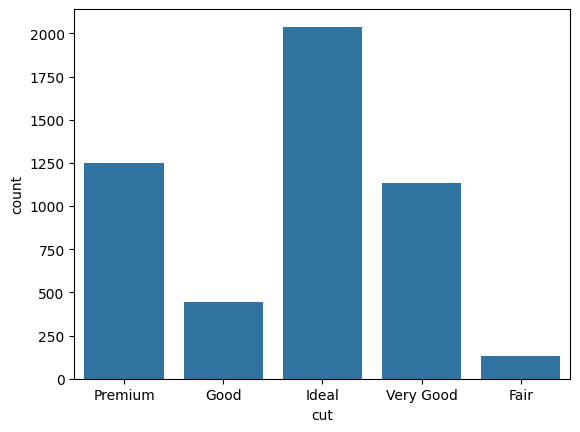

In [14]:
# COMPROBAR BALANCEO      de la variable respuesta y 
df_balanceo = pd.DataFrame({
    "conteo": df_reduced['cut'].value_counts(),
    "procentaje":(df_reduced['cut'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='cut')
df_balanceo

Efectivamente podemos apreciar que los datos no estan balanceados.

### Graficos Var/Numericas

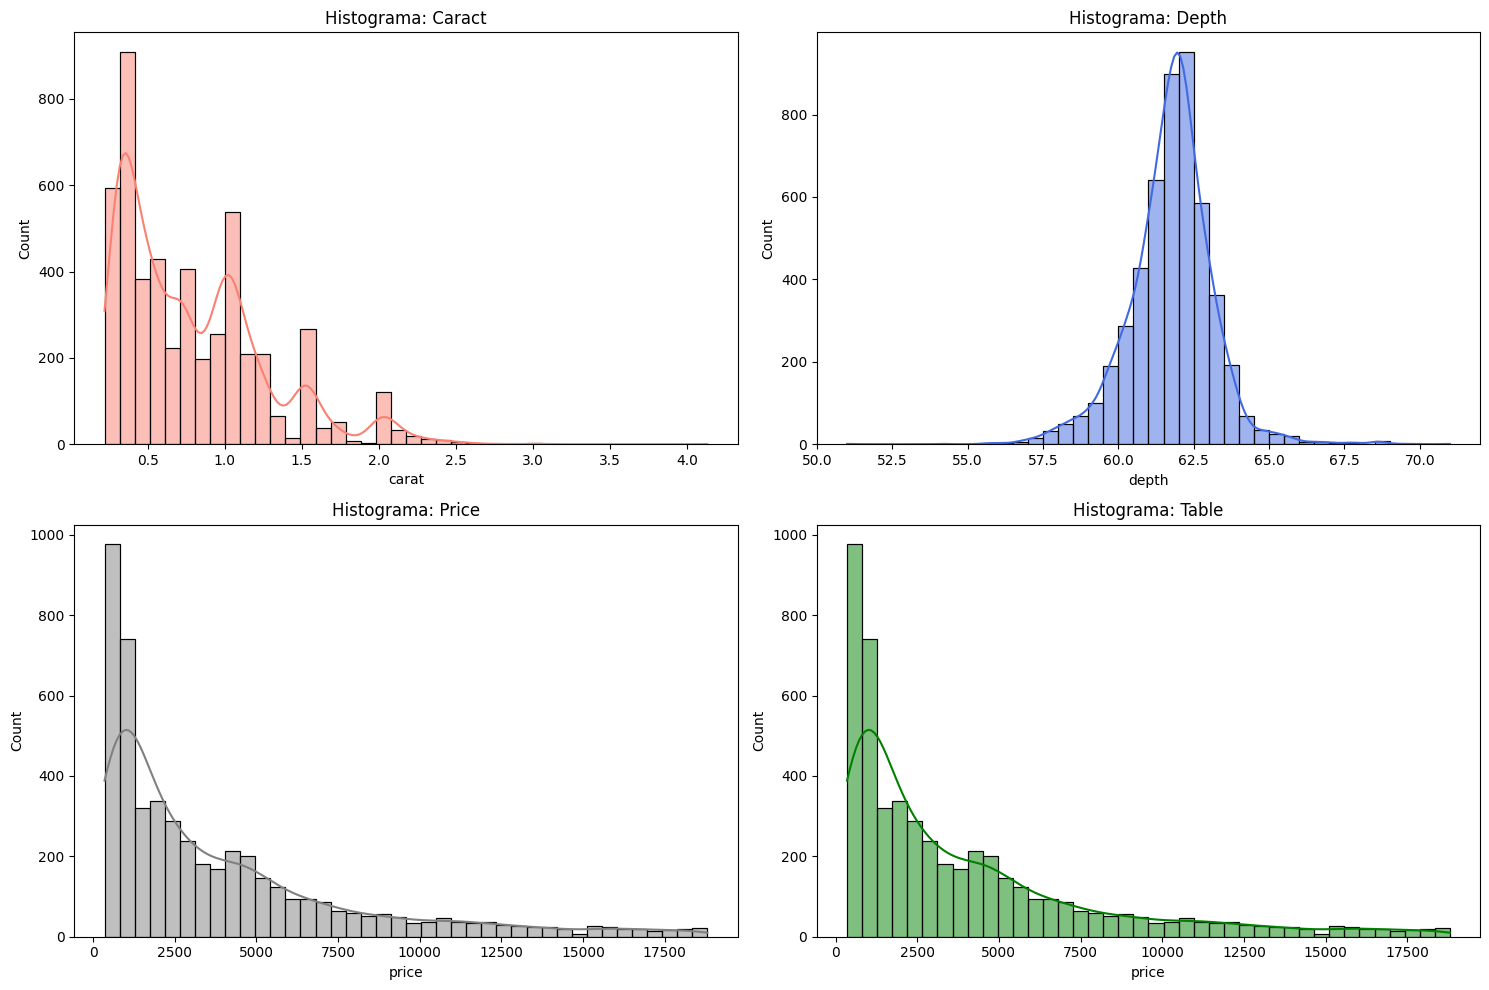

In [19]:
plt.figure(figsize=[15,10])

# Subplot CARACT
plt.subplot(2,2,1)
sns.histplot(data=df_reduced, x='carat', bins=40, kde=True, color='salmon')
plt.title('Histograma: Caract')

# Subplot DEPTH
plt.subplot(2,2,2)
sns.histplot(data=df_reduced, x='depth', bins=40, kde=True, color='royalblue')
plt.title('Histograma: Depth')

# Subplot PRICE
plt.subplot(2,2,3)
sns.histplot(data=df_reduced, x='price', bins=40, kde=True, color='gray')
plt.title('Histograma: Price')

# Subplot TABLE
plt.subplot(2,2,4)
sns.histplot(data=df_reduced, x='price', bins=40, kde=True, color='green')
plt.title('Histograma: Table')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribucion Profundidad')

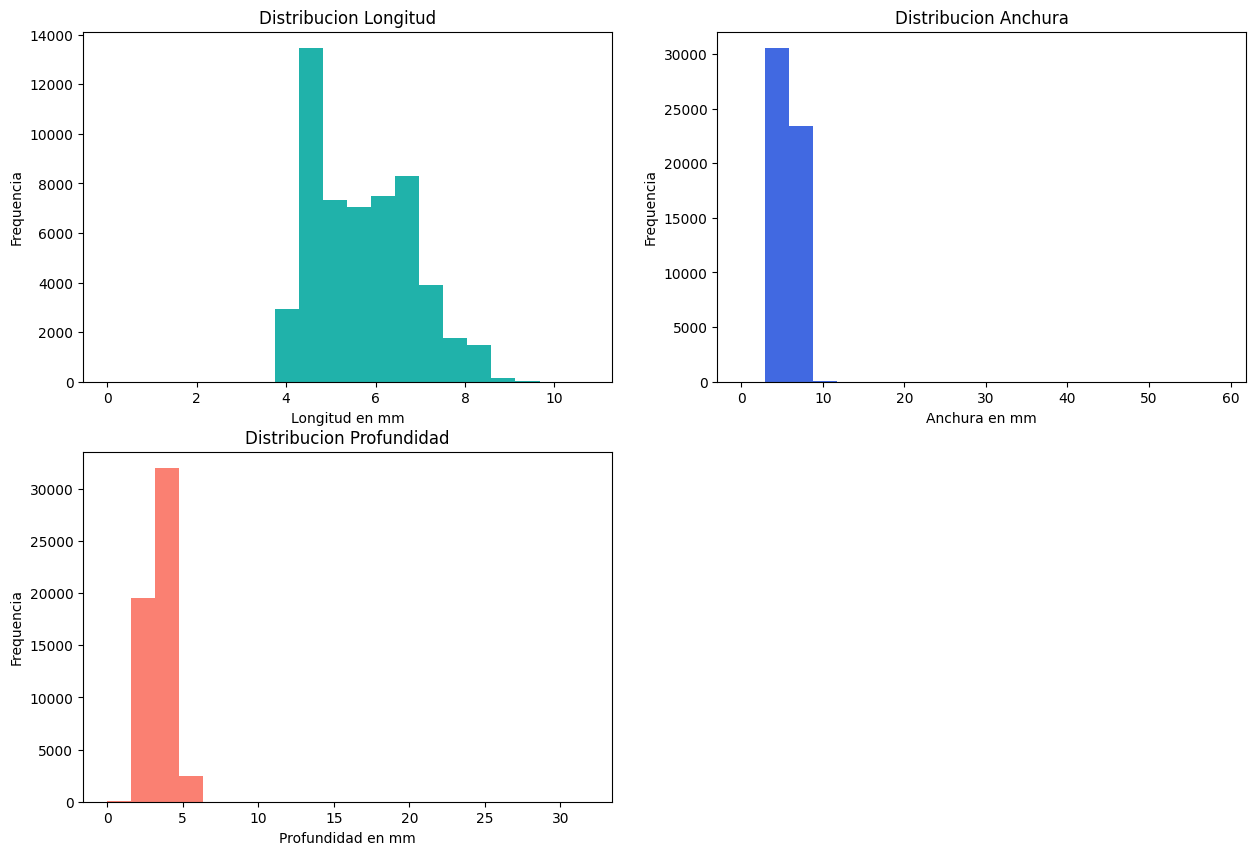

In [16]:
plt.figure(figsize=[15,10])

# Subplot X- Longitud
plt.subplot(2,2,1)
plt.hist(df['x'],bins=20,color='lightseagreen')
plt.xlabel('Longitud en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Longitud')

# Subplot V- ANCHURA
plt.subplot(2,2,2)
plt.hist(df['y'],bins=20,color='royalblue')
plt.xlabel('Anchura en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Anchura')

# Subplot Z-profunidad
plt.subplot(2,2,3)
plt.hist(df['z'],bins=20,color='salmon')
plt.xlabel('Profundidad en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Profundidad')

- Boxplot sin normalizacion de los datos.

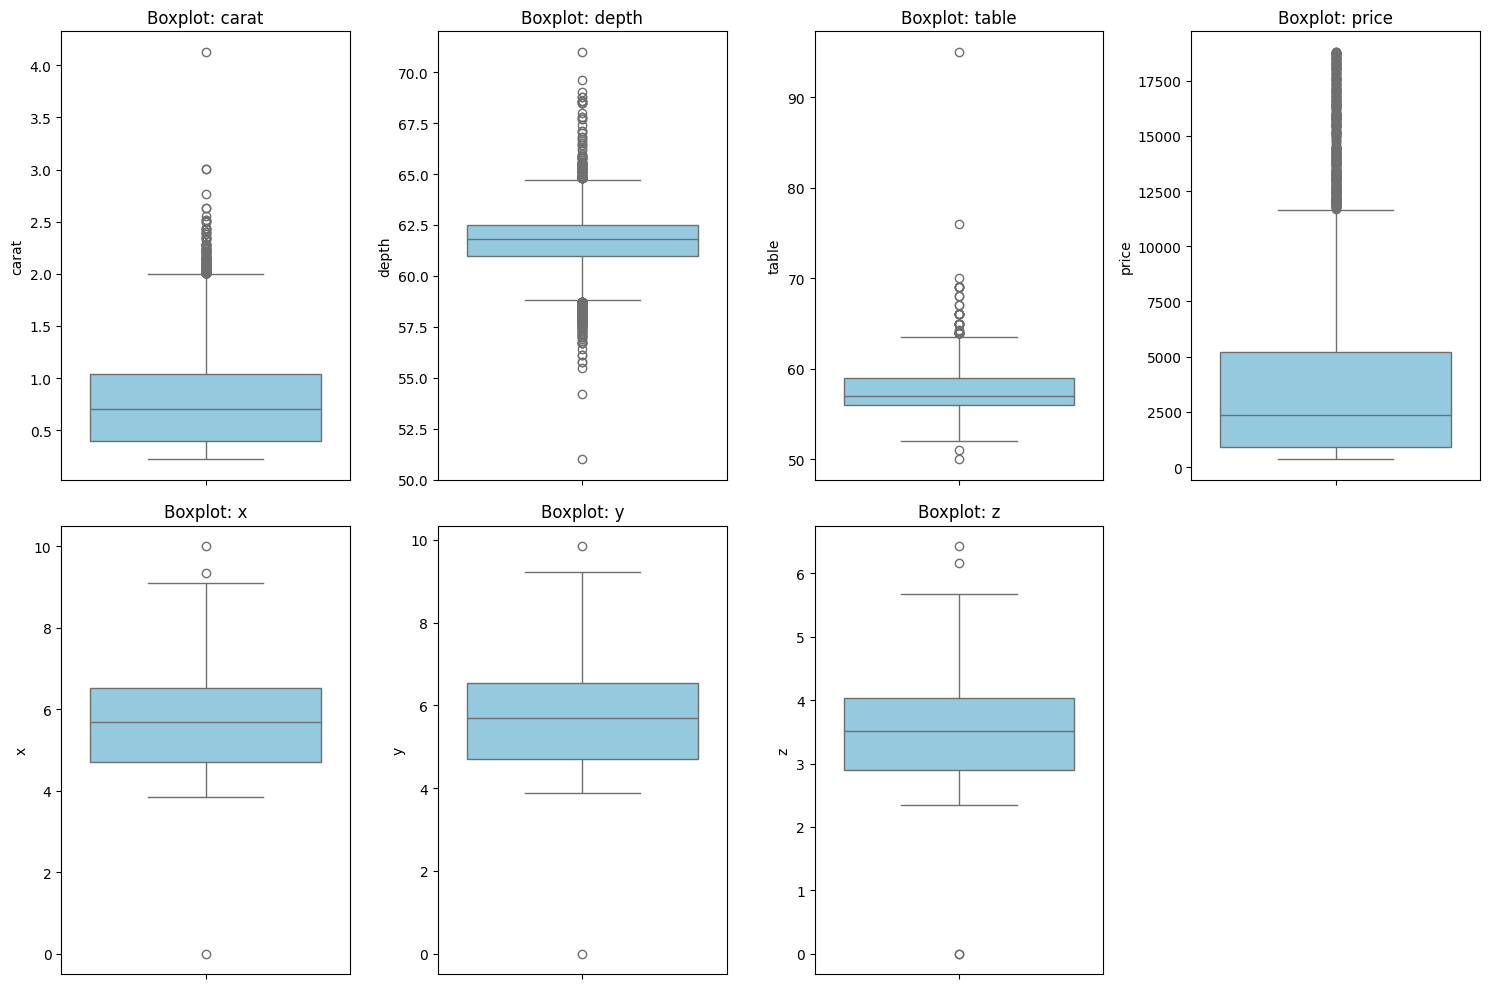

In [20]:
plt.figure(figsize=(15, 10))

for idx, col in enumerate(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], 1):
    plt.subplot(2, 4, idx)
    sns.boxplot(data=df_reduced, y=col, color='skyblue')
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()


- correlacion entre variables

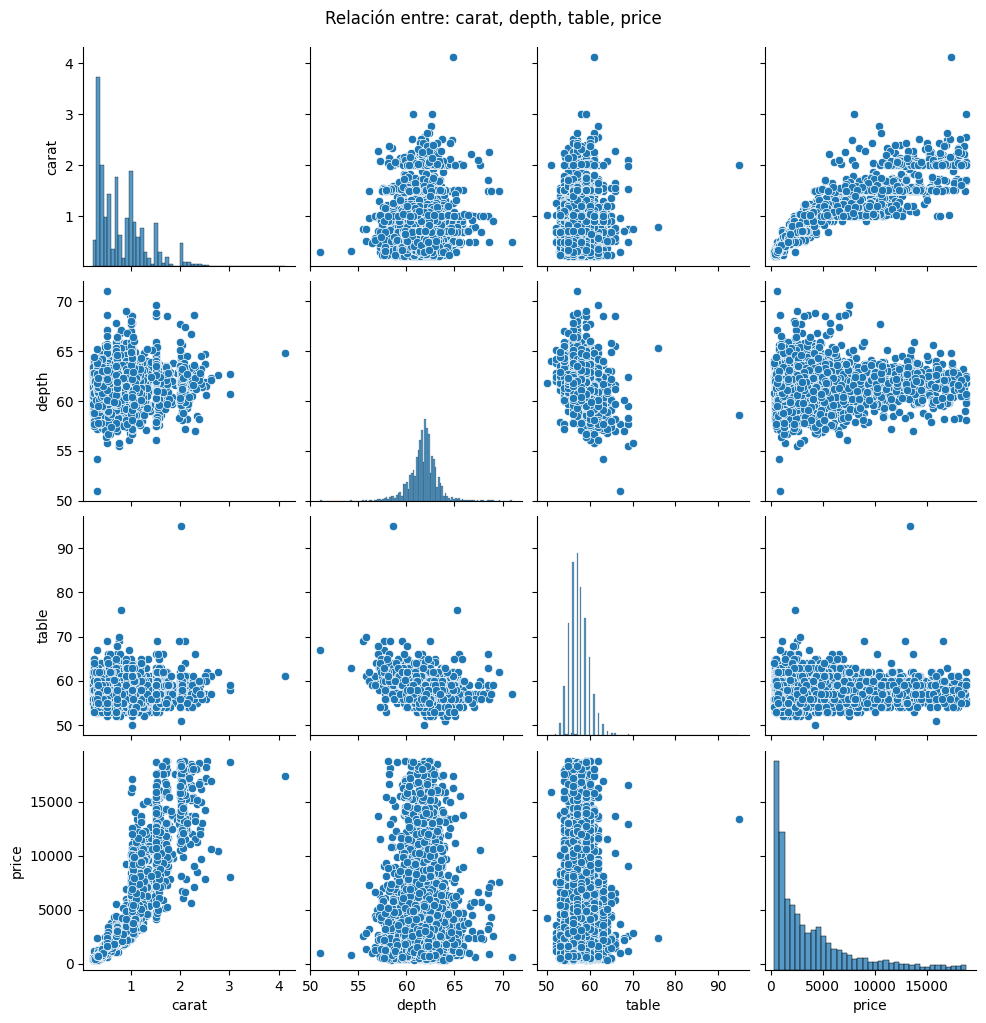

In [25]:
sns.pairplot(data=df_reduced, vars=['carat', 'depth', 'table', 'price'], diag_kind='hist', height=2.5)
plt.suptitle('Relación entre: carat, depth, table, price', y=1.02)
plt.show()

- CONLUSIONES: 
  - 'price' y 'caract' muestran un correlacion positiva pero no lineal. EN la cola superior se expande, posibles presencia de outliers. La distribucion es sesgada a la derecha
  - 'depth' y 'table' presentan relacion debil con 'price '
  - 'depht' y 'table' y 'carat' y 'table' presentan una estructura tipo cluster, con muy poca tendenicas linear.
  - ' caract' y ' depht' presentan una estructura tipo cluster, con muy poca tendenicas linear.
  - Conclusion price y caract tiene la "mejor" correlacion.

### Graficos Var/Categorica

- VISUALIZACION CLARITY
   - tabla conteo y porcentaja
   - histograma
   - Heatmap  con 'cut'

,clarity,procentaje
clarity,,
SI1,1203,24.06
VS2,1173,23.46
SI2,870,17.40
VS1,714,14.28
VVS2,482,9.64
VVS1,333,6.66
IF,156,3.12
I1,69,1.38


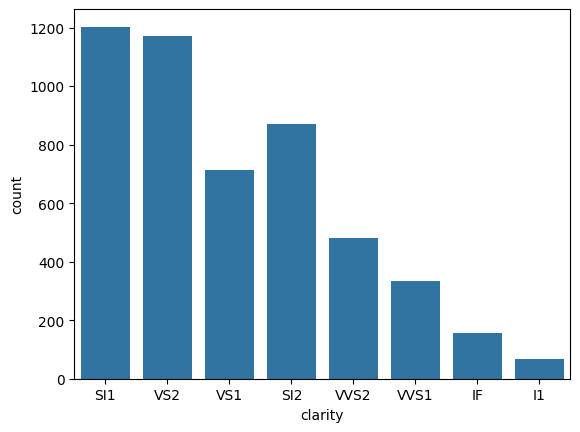

In [ ]:
df_clarity = pd.DataFrame({
    "clarity": df_reduced['clarity'].value_counts(),
    "procentaje":(df_reduced['clarity'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='clarity')
df_clarity



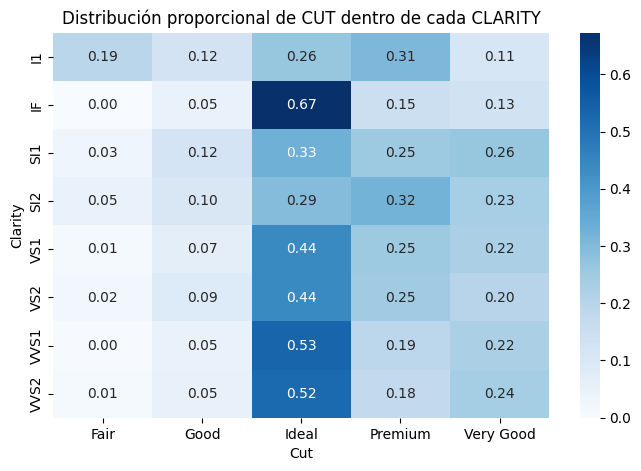

In [30]:
tabla = pd.crosstab(df_reduced['clarity'], df_reduced['cut'], normalize='index')

plt.figure(figsize=(8,5))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt=".2f")
plt.title('Distribución proporcional de CUT dentro de cada CLARITY')
plt.ylabel('Clarity')
plt.xlabel('Cut')
plt.show()


- VISUALIZACION COLOR
   - tabla conteo y porcentaja
   - histograma
   - heatmap con 'cut'

,color,procentaje
color,,
G,1071,21.42
E,925,18.50
F,890,17.80
H,748,14.96
D,633,12.66
I,473,9.46
J,260,5.20


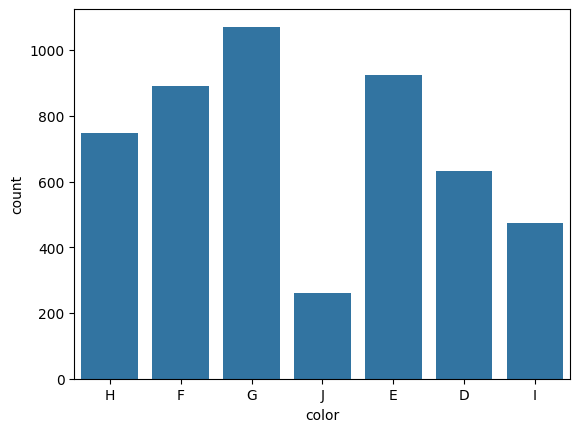

In [ ]:
df_color = pd.DataFrame({
    "color": df_reduced['color'].value_counts(),
    "procentaje":(df_reduced['color'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='color')
df_color

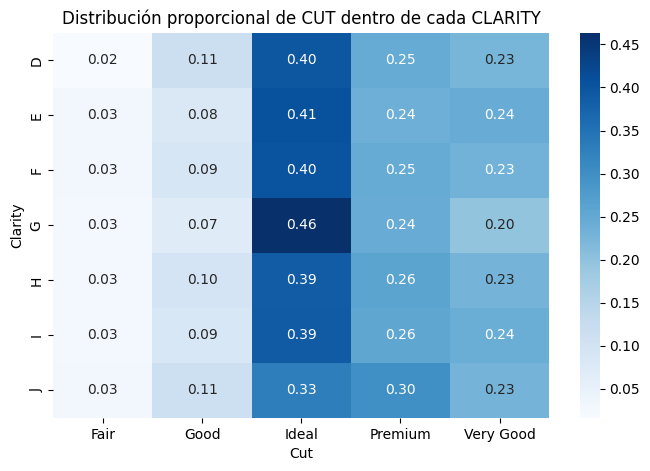

In [31]:
tabla = pd.crosstab(df_reduced['color'], df_reduced['cut'], normalize='index')

plt.figure(figsize=(8,5))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt=".2f")
plt.title('Distribución proporcional de CUT dentro de cada CLARITY')
plt.ylabel('Clarity')
plt.xlabel('Cut')
plt.show()


# Segmentacion  X , y

# Train_test-split

# Preprocesamiento

# Entrenamiento
 - probar min. dos mdelos. LogistRegression , KNeightborClassifiar 
 - probar para cada modelo diferentes metricas. 

# Validacion cruzada

# Ajustes de Hiperparametros

# Evauacion Final

# Evaluacion Final en Test

-   nota: recuerda que puedes utilizar el predict_proba ( )para ver la probabilidad de que occurra por cada clase ( revisa el notebook de regresion-logistica) 

# Interpretacion - Evaluacion Final

# Conclusiones

In [ ]:
# EMBEDINGS 

# ATENCION VALOR LO DE UTILIZAR PIPELINE , NO LO HAG MANUALMENTE CON GET_DUMMIES O ONE_HOT 
# CON EL PIPELINE SEPARAREMOS TRASFORMACIONES SEGUN SEAN NUMERICAS( IMPUTER +SCALER pro ejemplo)  O CATEGORICAS ( imputer + encoder)
# esto scikit leanr lo agurpa en una unica matriz qeu se lo pasara al modelo 
# DESPUES PODEMOS CONSIDERAR HACER UN GRAFICO DE CALAR CON LA CORRELACION ENTRE VARIABLES + UN BARPLOT (GRAFICO DE BARRAS) PONIENDO LA COLUMNA QUE NOS INTERESA EN ESTE CASO SERA CUT CON EL RESTO 
# RECUERDA que ene ste ultimo grafico los valores mas cercano a uo son los que teiene mas correlacion.
# revisar tambien la Multicolinealidad ( es decir relaciones fuertes entre variables de X ) . hay solucines para esto  revisa el motebook de regresion multiple

# agrega columnas nuevas. En nuestro caso podria valer para cut, color y clarity
# evitamos hacer un map para que no se genere una cierta ordenacion con peos distintos 

-  revision rapida para ver lso datos de X y y para ver overfitng y underfiting 

In [ ]:
# PREPAR FEATURE Y TARGET

# X= df_reduced[[pongo la o las fetaure que considere]]   --> RECUERDA HACERLO POR PARTES, ES DECRI PRIMERO UNA Y DESPUES IR AÑADIENDOLE
# y = df_reduced['cut']

                # AQUI PODEMOS UTILIZAR EL SISTEMA MMONDTADO EN LA UNIDA 1 O EN LOS APUNTES DE REGRESION_MULTIMPLE_MPG donde hace un bucle for de predictores 
                # es interesante probar primero un modelo añadiendoles poco a podo datos de entrad
                # posteriormente podemos poner mas modelos y comparar. Ver aunque sea de regestion lineal , el notebook de penguins 
                #               
# HAGO EL TRAIN TEST SPLIT

# HAGO LA VALIDACION CON 
                # cross_val_score
                # cross_validate  -->  nos da info de cuanto tiempo tarda en entrenar y predecir. ES MUY IMPORTANTE PROQUE POR EJEMPO CUANTO MAS COLUMNAS HAYA MAS TARDE  

# entreno el modelo

# hago prediciones sobre el modelo
        # y_pred = modelo.predict(X_train)
        # y_pred =,odelo.predict (X_test)
        # esto lo hacemos para valorar si tenemos overfiting o underfitting. Es la forma de comparar y ver si hay mucha diferencia. 
        # tambien podramos graficar los residuos ( añade residuo vs prediciones, etc ) para revelar over, under etc. 


# calculo las metricas . SON EL RESUMEN DE TODOS LOs RESIDUOS. cUANTO MAS CERCANS A ZERO  MEJOR  
# evaluo 


# PREPARACION X,y

In [ ]:
## Función de verificación para ver distribucion entre train y test 

# def verificar_division(y_train, y_test, nombre_target="target"):
#     """Verifica que la división mantiene proporciones similares."""
#     print(f"Verificación de la división:")
#     print(f"  Muestras train: {len(y_train)}")
#     print(f"  Muestras test: {len(y_test)}")
#     print(f"  Ratio test: {len(y_test) / (len(y_train) + len(y_test)):.2%}")
#     
#     if hasattr(y_train, 'value_counts'):  # pandas Series
#         print(f"\n  Distribución en train:\n{y_train.value_counts(normalize=True)}")
#         print(f"\n  Distribución en test:\n{y_test.value_counts(normalize=True)}")
# 
# # Usar la función
# verificar_division(pd.Series(y_train), pd.Series(y_test))

# Dentro del flujo de tragbajao recomnedado tenenmos el cross_val-score para valorar los modelos y decidir seguir o cambiar de modelos.

 df
* X, y
* train_test_split --> X_train, X_test, y_train, y_test
* OPCIONAL( noe sobligatorio es solo apra entender mejor el modelo ) : cross_val_score(modelo, X_train, y_train) --> ver scores y decidir si cambiar de Algoritmo o va bien
  * opcionalmente: visualizar en boxplot los scores 8 tiene que ver algun que ootro notebook que lo muestre como hacerlo 

* Entrenamiento:
  * model.fit(X_train, y_train)   entrenamos con todos los datos de entrenamiento.

* Predicción:
  * Opción 1: model.score(X_test, y_test) (solo da una métrica, r2 o accuracy)
  
  * Opción 2: 
    * y_pred = model.predict(X_test)   -->  despues calcularemos los score ( o metrica)  que queremos de forma manual. 
    ejemplos: 
    * r2_score(y_test, y_pred)     
    * mean_absolute_error(y_test, y_pred)

* Si todo OK y queremos preparar el modelo para producción
  * model.fit(X, y) --> entrenamos con todos los datos. 

In [ ]:
# Cargar datos
#   cancer = load_breast_cancer()
#   X, y = cancer.data, cancer.target
#   
#   # Definir validación cruzada estratificada
#   cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#   
#   # Modelos a comparar
#   modelos = {
#       'Logistic Regression': LogisticRegression(max_iter=10000),
#       'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
#       'Decision Tree': DecisionTreeClassifier(random_state=42)
#   }
#   
#   # Evaluar cada modelo
#   resultados = []
#   for nombre, modelo in modelos.items():
#       scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
#       resultados.append({
#           'Modelo': nombre,
#           'Accuracy Media': scores.mean(),
#           'Std': scores.std(),
#           'Min': scores.min(),
#           'Max': scores.max()
#       })
#   
#   # Mostrar resultados
#   df_resultados = pd.DataFrame(resultados)
#   df_resultados = df_resultados.sort_values('Accuracy Media', ascending=False)
#   print(df_resultados.to_string(index=False))